# Logistic Regression

2.ใช้โปรแกรมที่ได้จากข้อ 1 แก้ปัญหาจาก data ที่ generate ขึ้นมา โดยต้องอธิบายด้วยว่า data แต่ละชุด generate ขึ้นมาได้อย่างไร ตัวอย่างข้อมูล

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt

Sigmoid function
$$ g(z) = \frac{1}{1 + e^{-z}}    $$

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# test function
sigmoid(0)

0.5

สมมติฐาน (Hypothesis)
$$ h_θ(x) = g(θ_0x_0 + θ_1x_1 + θ_2x_2) $$

In [3]:
def hypothesis(w, X):
    H = sigmoid(np.dot(X, w))
    return H


# test function
hypothesis(np.array([0, 0, 0]), np.array(
    [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]))

array([0.5, 0.5, 0.5, 0.5])

Cost function
$$ J(θ) = \frac{1}{m} [−y^Tlog(h_θ(x)) − (1 − y)^Tlog(1 − h_θ(x))] $$

In [4]:
def Cost(H, Y):
    cost = -np.sum(Y*np.log(H) + (1-Y)*np.log(1-H))/len(Y)
    return cost


# test function
Cost(np.array([0.5, 0.5, 0.5, 0.5]), np.array([0, 0, 0, 1]))

0.6931471805599453

Gradient
$$ \frac{∂}{∂θ_j}J(θ) = \frac{1}{m}X^T(h_θ(x) − y) $$

Gradient descent
$$ θ_j ≔ θ_j-\frac{a}{m}X^T(h_θ(x) − y) $$

In [5]:
def gradientDescent(x, y, theta, learning_rate, iterations,show):
    cost_history = []
    theta_n = np.copy(theta)
    theta_history = []
    for epoch in range(iterations):
        H = hypothesis(theta_n, x)
        cost = Cost(H, y)
        gradient = np.dot(x.T, (H-y))/len(y)
        theta_n -= learning_rate * gradient
        theta_history.append(list(theta_n))
        cost_history.append(cost)
        if show :
            print(f"Epoch {epoch+1}/{iterations}:  CE: {cost:.10f}")

    return theta_n, cost_history, np.array(theta_history)

# test function
gradientDescent(
    np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]),
    np.array([0, 0, 0, 1]),
    np.array([0, 0, 0], dtype='float64'), 1, 1,True)

Epoch 1/1:  CE: 0.6931471806


(array([-0.25,  0.  ,  0.  ]),
 [0.6931471805599453],
 array([[-0.25,  0.  ,  0.  ]]))

Generate data

In [6]:
X, y = make_classification(n_samples=100,n_features=2, n_redundant=0,
                           n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

# X,y = make_moons(noise=0.1, random_state=0)

# X,y = make_circles(noise=0.2, factor=0.5, random_state=1)


In [7]:
x_class_A = []
x_class_B = []
for xx , yy in zip(X,y):
    if yy == 0 :
        x_class_A.append(xx)
    else :
        x_class_B.append(xx)
x_class_A = np.array(x_class_A)
x_class_B = np.array(x_class_B)
print(x_class_A.shape,x_class_B.shape)

(50, 2) (50, 2)


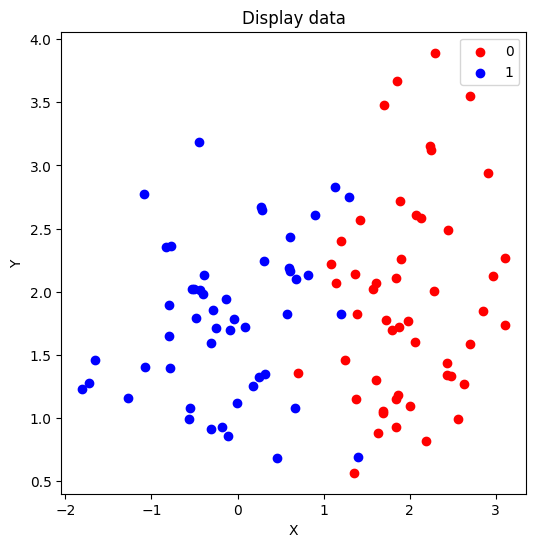

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(x_class_A[:,0],x_class_A[:,1], color='red', label='0')
plt.scatter(x_class_B[:,0], x_class_B[:,1], color='b', label='1')
# plt.plot(x_boundary,y_boundary, 'g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Display data')
plt.legend()
plt.show()

In [9]:
X = np.insert(X, 0, 1, axis=1)  # include intercept
print(X.shape)
theta = np.zeros(X.shape[1])
learning_rate = 1
iterations = 200

theta_final, cost_history, theta_history = gradientDescent(
    X, y, theta, learning_rate, iterations, True)
print("theta_final", theta_final)
print("Resulting cost:", cost_history[-1])

(100, 3)
Epoch 1/200:  CE: 0.6931471806
Epoch 2/200:  CE: 0.5036812094
Epoch 3/200:  CE: 0.4107124296
Epoch 4/200:  CE: 0.3582484012
Epoch 5/200:  CE: 0.3236319441
Epoch 6/200:  CE: 0.2988701156
Epoch 7/200:  CE: 0.2801717277
Epoch 8/200:  CE: 0.2654822831
Epoch 9/200:  CE: 0.2535898192
Epoch 10/200:  CE: 0.2437322478
Epoch 11/200:  CE: 0.2354054088
Epoch 12/200:  CE: 0.2282617821
Epoch 13/200:  CE: 0.2220535729
Epoch 14/200:  CE: 0.2165990216
Epoch 15/200:  CE: 0.2117615669
Epoch 16/200:  CE: 0.2074364721
Epoch 17/200:  CE: 0.2035419615
Epoch 18/200:  CE: 0.2000131822
Epoch 19/200:  CE: 0.1967979885
Epoch 20/200:  CE: 0.1938539359
Epoch 21/200:  CE: 0.1911460963
Epoch 22/200:  CE: 0.1886454426
Epoch 23/200:  CE: 0.1863276361
Epoch 24/200:  CE: 0.1841721039
Epoch 25/200:  CE: 0.1821613274
Epoch 26/200:  CE: 0.1802802877
Epoch 27/200:  CE: 0.1785160289
Epoch 28/200:  CE: 0.1768573102
Epoch 29/200:  CE: 0.1752943275
Epoch 30/200:  CE: 0.1738184872
Epoch 31/200:  CE: 0.1724222225
Epoch 32

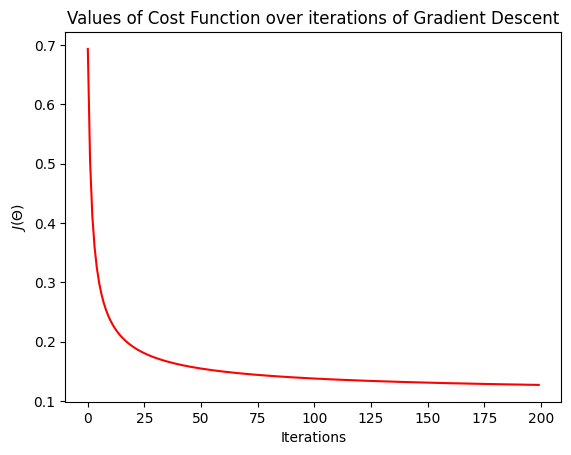

In [10]:
plt.plot(cost_history,color='red')
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
# plt.legend()
plt.title("Values of Cost Function over iterations of Gradient Descent");

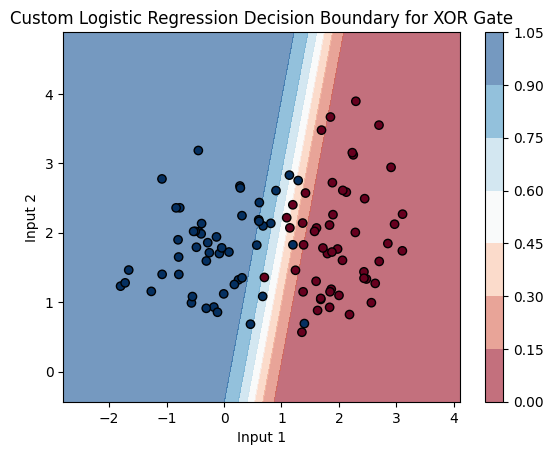

In [11]:
# Plot the decision boundary
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_data = np.c_[xx.ravel(), yy.ravel()]
Z = sigmoid(np.dot(grid_data, theta_final[1:]) + theta_final[:1])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.colorbar()

plt.scatter(X[:, 1], X[:, 2], c=y,
            cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Custom Logistic Regression Decision Boundary for XOR Gate")
plt.show()

#### 1.อธิบายข้อจำกัดของ logistic regression 

Logistic regression เป็นอัลกอริทึมในการแก้ปัญหาคลาสิฟิเคชัน (classification) ที่ใช้สมการเชิงเส้นเพื่อทำนายความน่าจะเป็นของผลลัพธ์ที่อยู่ในรูปของสองคลาส

แต่เมื่อข้อมูลไม่มีความสัมพันธ์เชิงเส้นเช่น ข้อมูลที่เป็นวงกลมหรือเส้นโค้งอาจทำให้มีปัญหาในการทำนายค่าความน่าจะเป็น

ปัญหา Overfitting เมื่อมีข้อมูลตัวอย่างของคลาสที่ไม่สมดุลกันแบบจำลอง อาจเรียนรู้และทำนายผลลัพธ์ได้ไม่ถูกต้อง เช่น เมื่อมีคลาสหนึ่งมีจำนวนตัวอย่างมากมายกว่าอีกคลาสหนึ่ง อาจทำให้โมเดลมีแนวโน้มที่จะทำนายคลาสที่มากกว่าแม้ว่าข้อมูลจริง ๆ แล้วควรที่จะทำนายคลาสอื่น

#### 2.แนวทางในการปรับปรุงประสิทธิภาพ

- แก้ไขตัวแปรให้เหมาะสมและมีความหมายมากยิ่งขึ้น โดยการเลือกและสร้างตัวแปรใหม่ที่สามารถช่วยให้โมเดลมีความสามารถในการทำนายมากขึ้น

- การใช้เทคนิค regularization เพื่อลดความเสี่ยงในการเกิดโอเวอร์ฟิตติ้ง